# Import neccesary libraries

In [89]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# explaination of the model
import shap

In [2]:
# Load the data
train_df = pd.read_csv('./input/train.csv')
test_df = pd.read_csv('./input/test.csv')


In [3]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [5]:
# Check data types of each feature
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

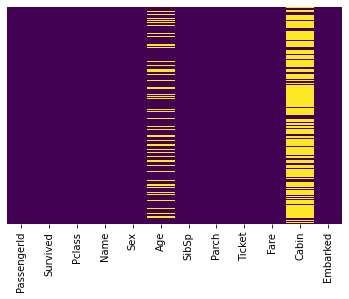

In [6]:
#Check null values in each feature
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:>

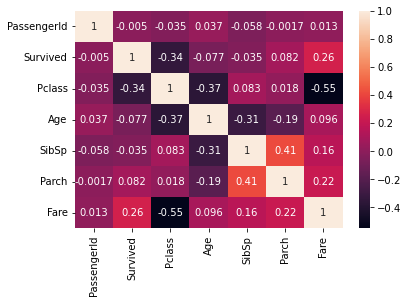

In [7]:
sns.heatmap(train_df.corr(), annot=True)

In [8]:
# Check for the distribution of data for each feature
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


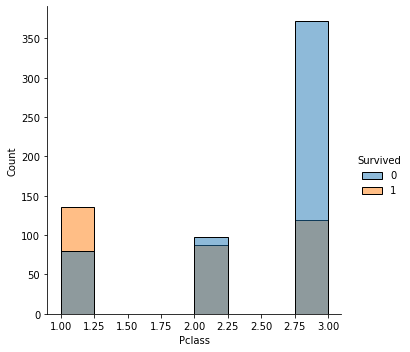

In [9]:
sns.displot(x='Pclass', bins=8,data=train_df, hue='Survived')

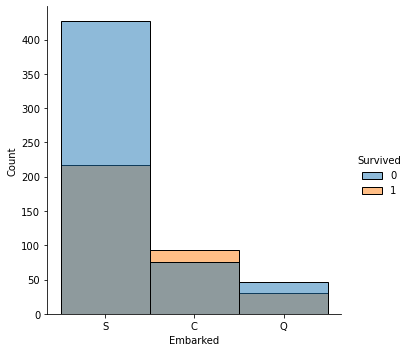

In [10]:
sns.displot(x='Embarked', bins=8,data=train_df, hue='Survived')

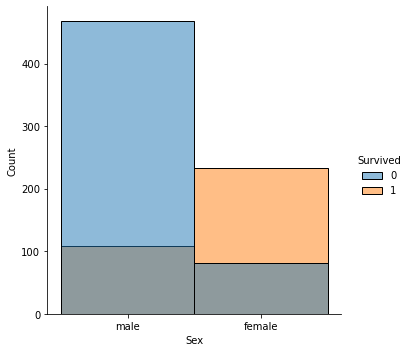

In [11]:
sns.displot(x='Sex', bins=8,data=train_df, hue='Survived')

In [12]:
#pipeline
def preprocessing(dataframe):
    try:
        dataframe = dataframe.drop(['Name', 'Ticket', 'Cabin','PassengerId'], axis=1)
        dataframe = pd.get_dummies(dataframe, columns=['Sex','Embarked','Pclass'])
        # Drop the columns with less information gain
        dataframe = dataframe.drop(['Pclass_2','Embarked_Q','Sex_female'], axis=1)
        dataframe['SibSp'].loc[dataframe['SibSp'] > 0]=1
        dataframe['Parch'].loc[dataframe['Parch'] > 0]=1
    except:
        pass

    return dataframe

In [13]:
# One-hot encoding of categorical features
train_df = train_df.pipe(preprocessing)
##train_df= pd.get_dummies(train_df, columns=['Sex','Embarked','Pclass'])
#train_df = train_df.drop(['Pclass_2','Embarked_Q','Sex_female'], axis=1)


C:\Users\agusp\AppData\Local\Temp\ipykernel_14096\396466851.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['SibSp'].loc[dataframe['SibSp'] > 0]=1
C:\Users\agusp\AppData\Local\Temp\ipykernel_14096\396466851.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['Parch'].loc[dataframe['Parch'] > 0]=1


In [14]:
train_df.pipe(preprocessing)

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_S,Pclass_1,Pclass_3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,1,0,1,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,1,0
4,0,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,1,0,1,0,0
887,1,19.0,0,0,30.0000,0,0,1,1,0
888,0,NaN,1,1,23.4500,0,0,1,0,1
889,1,26.0,0,0,30.0000,1,1,0,1,0


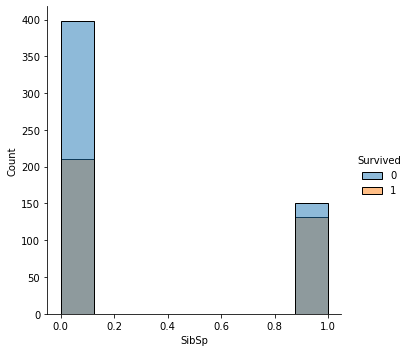

In [15]:
sns.displot(x='SibSp', bins=8,data=train_df, hue='Survived')

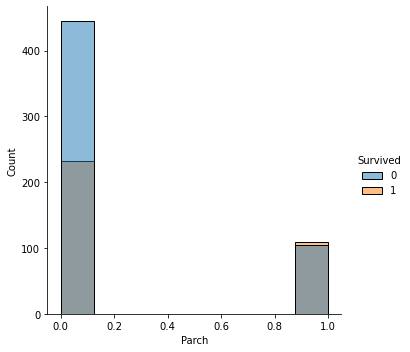

In [16]:
sns.displot(x='Parch', bins=8,data=train_df, hue='Survived')

<AxesSubplot:>

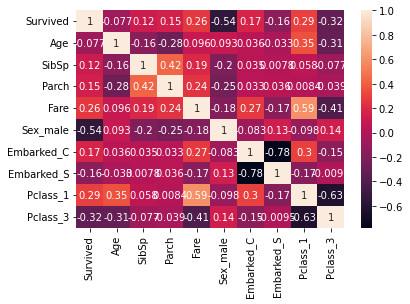

In [17]:
sns.heatmap(train_df.corr(), annot=True)

In [20]:
# Impute the missing values with the KNN algorithm
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputer.fit_transform(train_df)
# Create dataframe with data from imputer
train_df = pd.DataFrame(imputer.transform(train_df), columns=train_df.columns)

In [21]:
train_df.describe(include='all')

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_S,Pclass_1,Pclass_3
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,30.510853,0.317621,0.239057,32.204208,0.647587,0.188552,0.722783,0.242424,0.551066
std,0.486592,14.423568,0.465813,0.426747,49.693429,0.477990,0.391372,0.447876,0.428790,0.497665
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,21.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,80.000000,1.000000,1.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    float64
 3   Parch       891 non-null    float64
 4   Fare        891 non-null    float64
 5   Sex_male    891 non-null    float64
 6   Embarked_C  891 non-null    float64
 7   Embarked_S  891 non-null    float64
 8   Pclass_1    891 non-null    float64
 9   Pclass_3    891 non-null    float64
dtypes: float64(10)
memory usage: 69.7 KB


In [22]:
train_df.describe(include='all')

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_S,Pclass_1,Pclass_3
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,30.510853,0.317621,0.239057,32.204208,0.647587,0.188552,0.722783,0.242424,0.551066
std,0.486592,14.423568,0.465813,0.426747,49.693429,0.477990,0.391372,0.447876,0.428790,0.497665
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,21.000000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,29.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,38.000000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,80.000000,1.000000,1.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


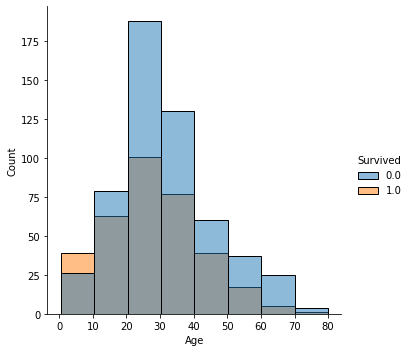

In [22]:
sns.displot(x='Age', bins=8,data=train_df, hue='Survived')


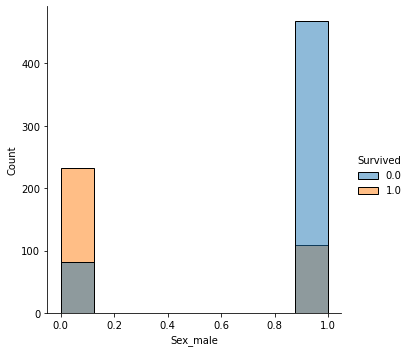

In [23]:
sns.displot(x='Sex_male', bins=8,data=train_df, hue='Survived')

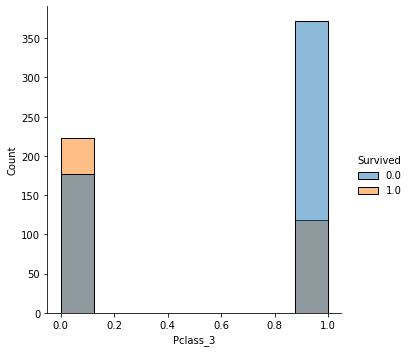

In [24]:
sns.displot(x='Pclass_3', bins=8,data=train_df, hue='Survived')

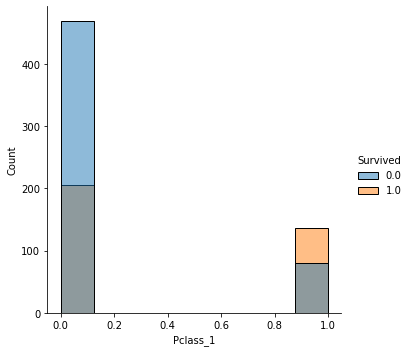

In [25]:
sns.displot(x='Pclass_1', bins=8,data=train_df, hue='Survived')

<AxesSubplot:>

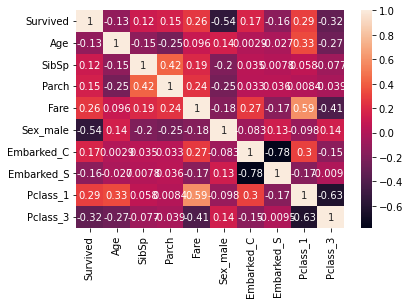

In [73]:
sns.heatmap(train_df.corr(), annot=True)

In [81]:
#Compute VIF data for each independent variable
from statsmodels.stats.outliers_influence import variance_inflation_factor
features = train_df.loc[:, train_df.columns!='Survived']
vif = pd.DataFrame()
vif["features"] = features.columns
vif["vif_Factor"] = [variance_inflation_factor(features.values, i) for i in range(features.shape[1])]
vif

,features,vif_Factor
0,Age,4.982481
1,SibSp,1.788292
2,Parch,1.778851
3,Fare,2.434864
4,Sex_male,3.230874
5,Embarked_C,2.285193
6,Embarked_S,5.210234
7,Pclass_1,3.069204
8,Pclass_3,2.822593


In [80]:
features = train_df.loc[:, train_df.columns!='Survived']

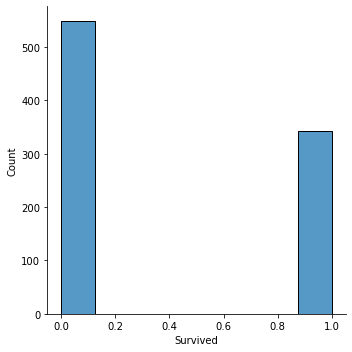

In [27]:
sns.displot(x='Survived', bins=8,data=train_df)

In [28]:
# Calculte the mutual information scores for each feature
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

X_train = train_df.loc[:, train_df.columns != 'Survived']
y_train=train_df['Survived']
mi_scores = make_mi_scores(X_train, y_train)
mi_scores[::3]  # show a few features with their MI scores


Sex_male      0.170489
Pclass_3      0.044910
Embarked_S    0.028109
Name: MI Scores, dtype: float64

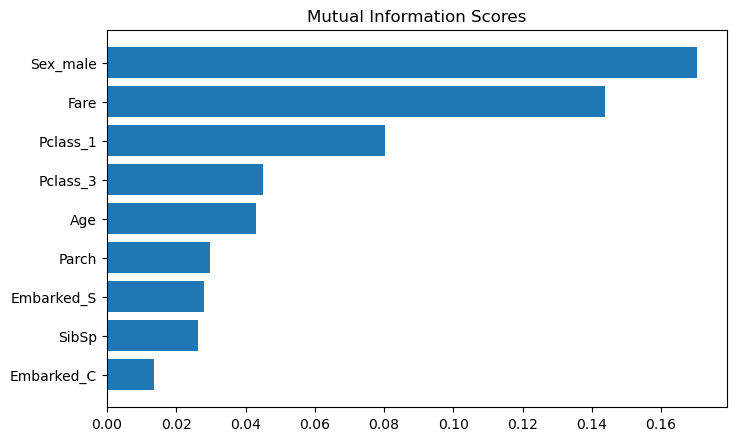

In [29]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

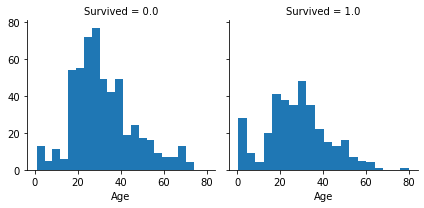

In [30]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

c:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


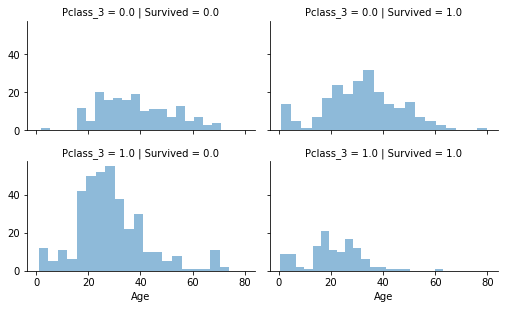

In [31]:
# grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass_3', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

c:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\seaborn\axisgrid.py:675: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


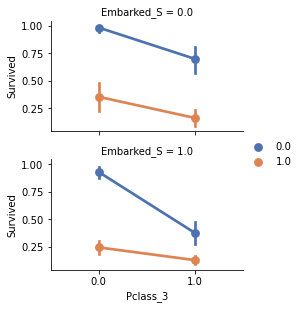

In [32]:
# grid = sns.FacetGrid(train_df, col='Embarked')
grid = sns.FacetGrid(train_df, row='Embarked_S', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass_3', 'Survived', 'Sex_male', palette='deep')
grid.add_legend()

c:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\ProgramData\Anaconda3\envs\tf-gpu\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


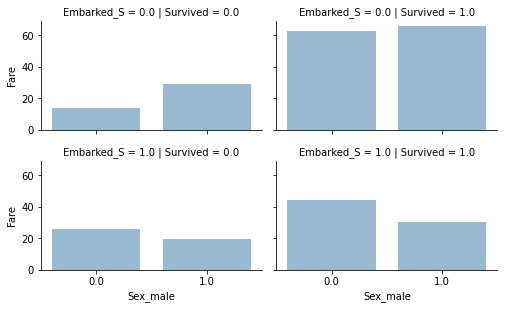

In [33]:

# grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})
grid = sns.FacetGrid(train_df, row='Embarked_S', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex_male', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [34]:
from sklearn.model_selection import train_test_split
X = train_df.loc[:, train_df.columns != "Survived"]
y = train_df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [35]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [71]:
# Support Vector Machines

grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

svc = GridSearchCV(estimator=SVC(), param_grid=grid,cv=5,)
svc.fit(X_train, y_train)
svc.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85       175
         1.0       0.80      0.72      0.76       120

    accuracy                           0.81       295
   macro avg       0.81      0.80      0.80       295
weighted avg       0.81      0.81      0.81       295



In [56]:
# KNN classifier
grid = { 
    'n_neighbors': [1,2,3,4,5,6,7,8,9,10]
}
KNN = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=grid, cv= 5)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.71      0.83      0.77       175
         1.0       0.68      0.51      0.58       120

    accuracy                           0.70       295
   macro avg       0.69      0.67      0.67       295
weighted avg       0.70      0.70      0.69       295



In [85]:
# Random Forest

grid = { 
    'n_estimators': [25,50,75,100],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    'random_state' : [18]
}
rf_cv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, cv= 5)
rf_cv.fit(X_train, y_train)
y_pred = rf_cv.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.91      0.85       175
         1.0       0.83      0.67      0.74       120

    accuracy                           0.81       295
   macro avg       0.82      0.79      0.80       295
weighted avg       0.81      0.81      0.81       295



In [102]:
# explain all the predictions in the test setç
# initialize javascript visualization
shap.initjs()

explainer = shap.KernelExplainer(rf_cv.predict_proba, X_train)
shap_values = explainer.shap_values(X_test[1:2])
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test[1:2])

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
Using 596 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/1 [00:00<?, ?it/s]

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
